In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 固定的十个术语（按指定顺序）
selected_terms = [
    'social cognition',
    'autobiographical memory',
    'valence',
    'schizophrenia',
    'mood',
    'risk',
    'loss',
    'impulsivity',
    'hyperactivity',
    'inhibition'
]

def prepare_data(csv_files):
    """从多个CSV文件中提取指定术语的r值"""
    all_data = []
    for file in csv_files:
        df = pd.read_csv(file)
        # 筛选并排序指定术语
        df_filtered = df[df['feature'].isin(selected_terms)]
        # 按指定顺序重新排序
        df_sorted = df_filtered.set_index('feature').loc[selected_terms].reset_index()
        values = df_sorted['r'].tolist()
        all_data.append(values)
    return all_data

def plot_combined_radar(features, data_list, colors, labels, title):
    """绘制包含多个数据集的雷达图"""
    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # 闭合
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # 绘制每个数据集
    for data, color, label in zip(data_list, colors, labels):
        # 闭合数据
        closed_data = data + data[:1]
        ax.plot(angles, closed_data, color=color, linewidth=2, label=label)
        ax.fill(angles, closed_data, color=color, alpha=0.1)
    
    # 设置坐标轴
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    ax.tick_params(axis='x', pad=15)  # 调整标签间距
    ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
    ax.set_yticklabels(['0.1', '0.2', '0.3', '0.4', '0.5'], color='grey', size=8)
    ax.set_ylim(0, 0.5)
    
    # 添加标题和图例
    ax.set_title(title, size=16, pad=35)
    ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.15))
    plt.tight_layout()
    plt.show()


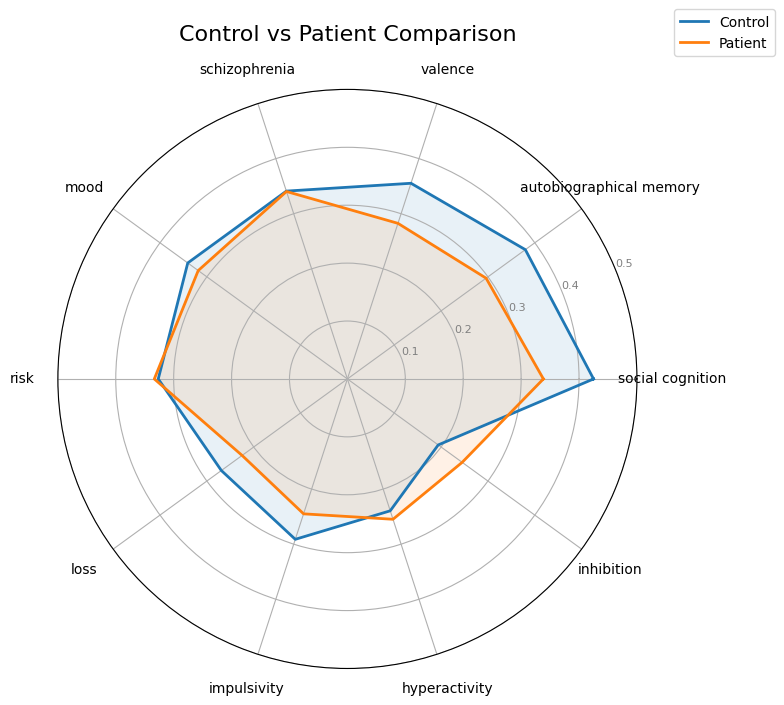

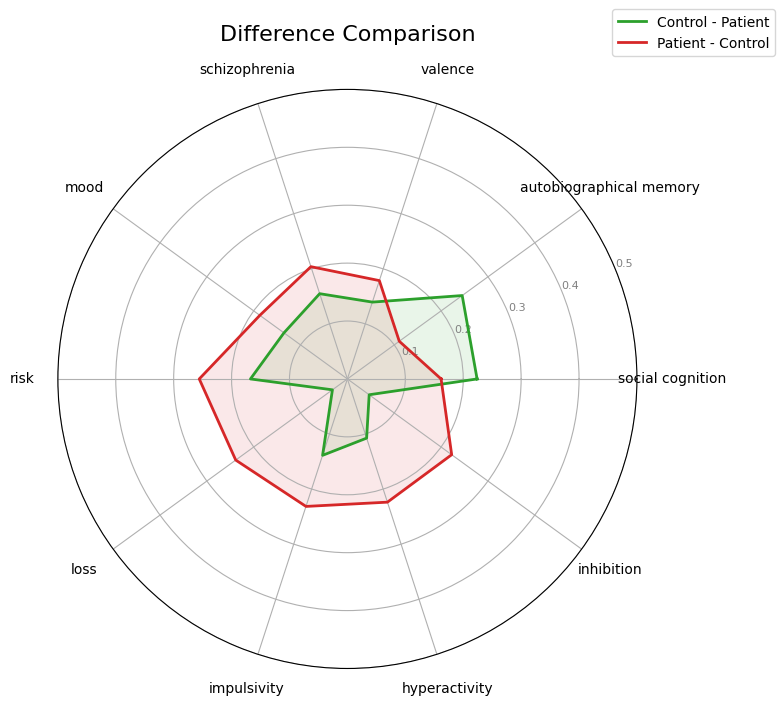

In [15]:

# 第一组：control vs patient
group1_files = ['/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/control_clean.csv', '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_clean.csv']
group1_data = prepare_data(group1_files)
plot_combined_radar(selected_terms, 
                   group1_data,
                   colors=['#1f77b4', '#ff7f0e'],
                   labels=['Control', 'Patient'],
                   title='Control vs Patient Comparison')

# 第二组：differences
group2_files = ['/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/control_minus_patient_clean.csv', '/Users/ss/Documents/Self_Psych_Meta/Output/wordcloud/patient_minus_control_clean.csv']
group2_data = prepare_data(group2_files)
plot_combined_radar(selected_terms, 
                   group2_data,
                   colors=['#2ca02c', '#d62728'],
                   labels=['Control - Patient', 'Patient - Control'],
                   title='Difference Comparison')
